Develop a model to predict individual medical insurance charges based on personal
attributes.
Dataset Overview:
The dataset contains 1,338 records with the following features:
• age: Age of the individual
• sex: Gender (male/female)
• bmi: Body Mass Index
• children: Number of children covered by insurance
• smoker: Smoking status (yes/no)
• region: Residential region in the U.S. (northeast, southeast, southwest,
northwest)
• charges: Medical insurance charges (target variable)

In [3]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Data Exploration:


In [4]:
#import Dataset
insurance=pd.read_csv('/content/insurance.csv')

In [5]:
#Features of Insurance Dataset
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
#shape of insurance dataset ==>dataset.shape
insurance.shape

(1338, 7)

In [ ]:
#General information of insurance dataset==>dataset.info()
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#statistical information about numerical column==>dataset.describe
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Understand the distribution of each feature.


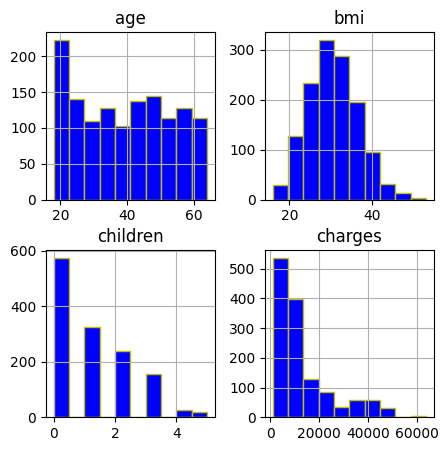

In [ ]:
#For numerical Features
insurance.hist(figsize=(5,5),color='blue',edgecolor='y')
plt.show()


In [ ]:
#for Categorical Features :Countplot and value count
print(insurance['sex'].value_counts())
print(insurance['smoker'].value_counts())
print(insurance['region'].value_counts())


sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


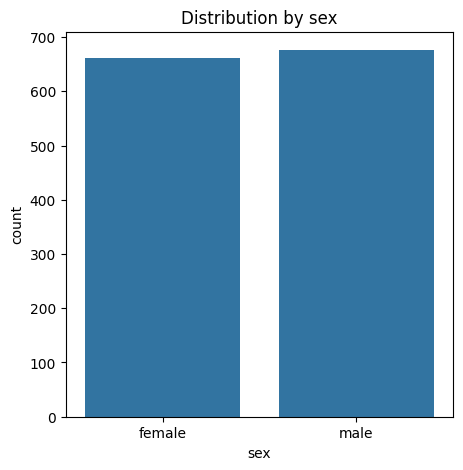

In [ ]:
#countplot for sex
plt.figure(figsize=(5,5))
plt.title('Distribution by sex')
sns.countplot(data=insurance,x='sex')
plt.show()

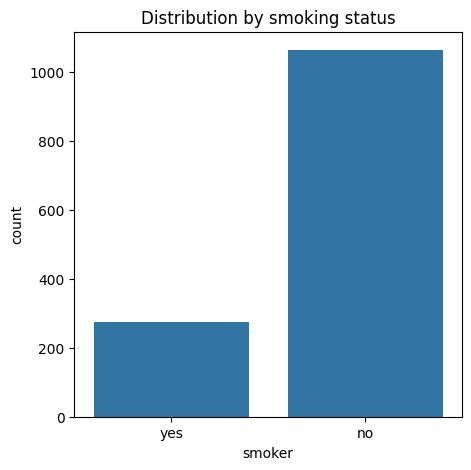

In [ ]:
#countplot for smoking status
plt.figure(figsize=(5,5))
plt.title('Distribution by smoking status')
sns.countplot(data=insurance,x='smoker')
plt.show()

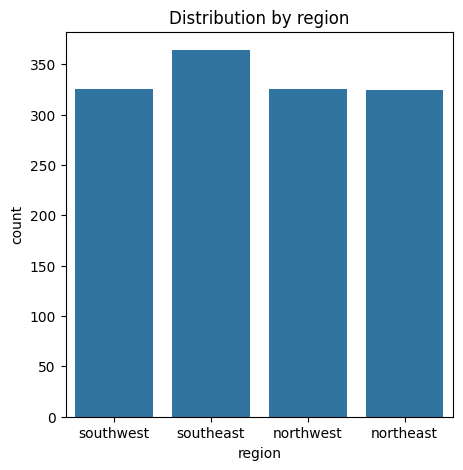

In [ ]:
#countplot for region
plt.figure(figsize=(5,5))
plt.title('Distribution by region')
sns.countplot(data=insurance,x='region')
plt.show()

Identify relationships between features and the target variable.


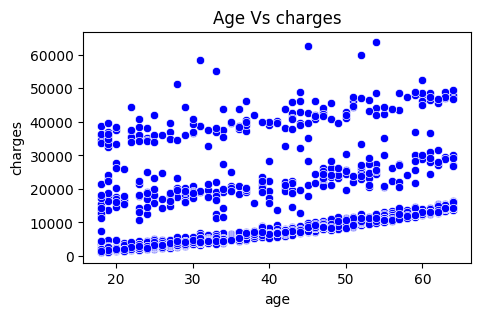

In [ ]:
#scatterplot==>relationship b/w two numeric columns
# age   Vs  charges

plt.figure(figsize=(5,3))
sns.scatterplot(x= 'age',y= 'charges',data=insurance,color='blue')
plt.xlabel('age')
plt.ylabel('charges')
plt.title('Age Vs charges')
plt.show()

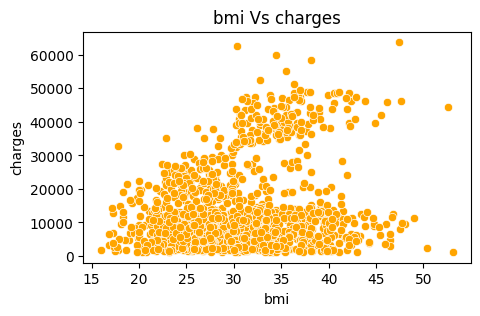

In [ ]:
#scatterplot(num vs num)==>relationship b/w two numeric columns
# bmi   Vs  charges

plt.figure(figsize=(5,3))
sns.scatterplot(x= 'bmi',y= 'charges',data=insurance,color='orange')
plt.xlabel('bmi')
plt.ylabel('charges')
plt.title('bmi Vs charges')
plt.show()

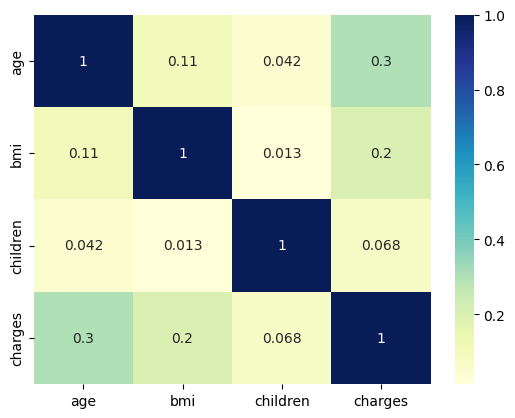

In [ ]:
#correlation heatmap

sns.heatmap(insurance.corr(numeric_only=True),annot=True,cmap='YlGnBu')
plt.show()

<ipython-input-24-81e5095e3bd1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex',y='charges',data=insurance,palette='coolwarm')


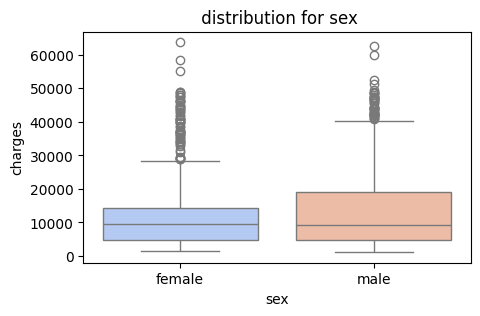

In [ ]:
# Boxplot for charge vs sex
plt.figure(figsize=(5,3))
sns.boxplot(x='sex',y='charges',data=insurance,palette='coolwarm')
plt.xlabel('sex')
plt.ylabel('charges')
plt.title(' Boxplot for sex')
plt.show()

<ipython-input-25-3252eeea4c15>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker',y='charges',data=insurance,palette='coolwarm')


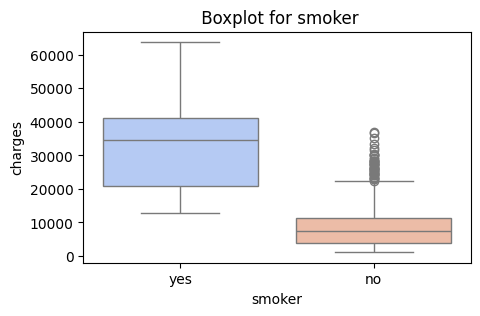

In [ ]:
# Boxplot for charge vs smoker
plt.figure(figsize=(5,3))
sns.boxplot(x='smoker',y='charges',data=insurance,palette='coolwarm')
plt.xlabel('smoker')
plt.ylabel('charges')
plt.title(' Boxplot for smoker')
plt.show()

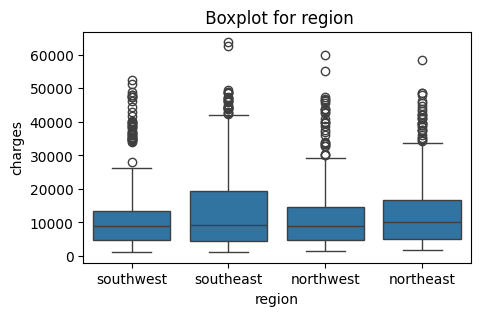

In [ ]:
# Boxplot for charge vs region
plt.figure(figsize=(5,3))
sns.boxplot(x='region',y='charges',data=insurance)
plt.xlabel('region')
plt.ylabel('charges')
plt.title(' Boxplot for region')
plt.show()

##Data Preprocessing:

Handle missing values


In [ ]:
#count missing value
insurance.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


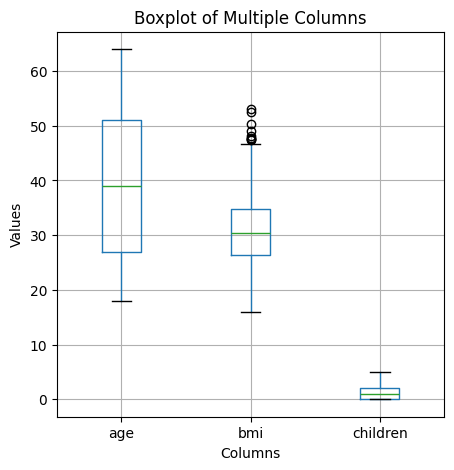

In [ ]:
#Checking the columns to apply the outlier treatment using boxplot
columns_to_plot = ['age','bmi','children']
# Create boxplot
plt.figure(figsize=(5,5))
insurance[columns_to_plot].boxplot()
plt.title('Boxplot of Multiple Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

Text(0.5, 1.0, 'Boxplot of Bmi')

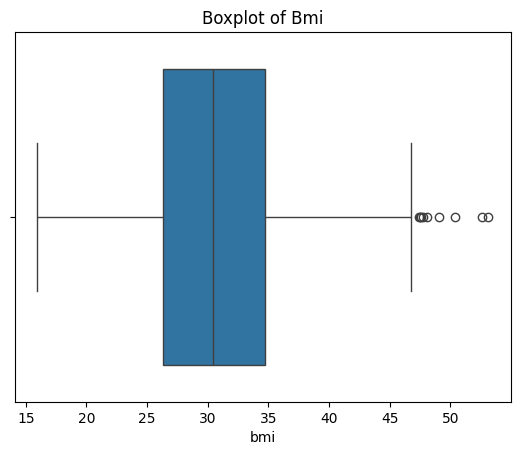

In [6]:
#Boxplot for bmi before outlier treatment
sns.boxplot(x=insurance['bmi'],data=insurance)
plt.title('Boxplot of Bmi')

In [7]:
#Outlier treatment for bmi
Q1=insurance['bmi'].quantile(0.25)
Q2=insurance['bmi'].quantile(0.5)
Q3=insurance['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print('The lower_bound is',lower_bound)
print('The upper_bound is',upper_bound)
insurance['bmi'] = np.where(insurance['bmi'] < lower_bound, lower_bound, insurance['bmi'])
insurance['bmi'] = np.where(insurance['bmi'] > upper_bound, upper_bound, insurance['bmi'])

The lower_bound is 13.7
The upper_bound is 47.290000000000006


Text(0.5, 1.0, 'Boxplot of Bmi')

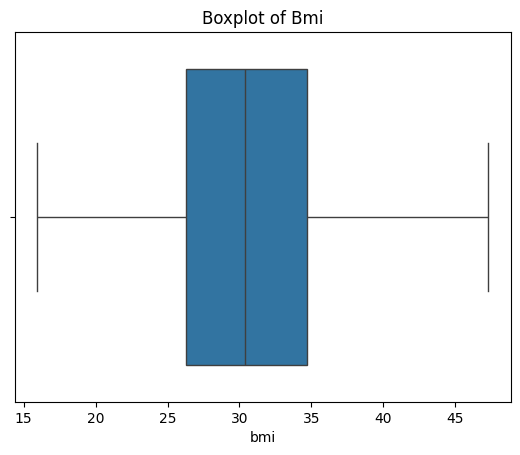

In [8]:
#after outlier treatment bmi
sns.boxplot(x=insurance['bmi'],data=insurance)
plt.title('Boxplot of Bmi')

Encode categorical variables appropriately.


In [15]:
#import Label Encoder
from sklearn.preprocessing import LabelEncoder
categorical_cols_label = ['sex','smoker','region']

# Initialize the LabelEncoder
label_encoder = {}
for col in categorical_cols_label:
    le = LabelEncoder()
    insurance[col] = le.fit_transform(insurance[col])
    label_encoder[col] = le
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


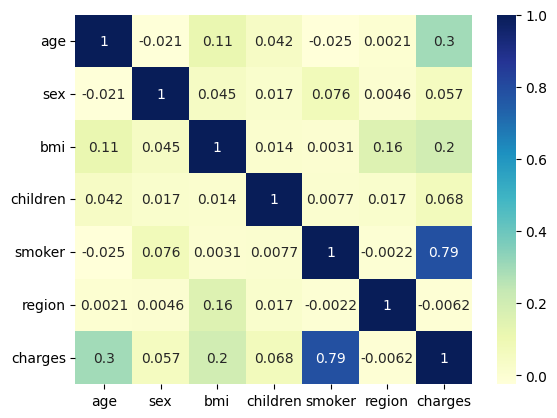

In [16]:
# heatmap

sns.heatmap(insurance.corr(numeric_only=True),annot=True,cmap='YlGnBu')
plt.show()

In [17]:
#display correlation matrix
insurance.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.111930,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.044802,0.017163,0.076185,0.004588,0.057292
bmi,0.111930,0.044802,1.000000,0.013700,0.003146,0.157811,0.198997
children,0.042469,0.017163,0.013700,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003146,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157811,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198997,0.067998,0.787251,-0.006208,1.000000


Model Development:


Split the data into training and testing sets.


In [21]:
# Importing libraries for Train-test split
from sklearn.model_selection import train_test_split, cross_val_score

# Split the data into features (x) and target variable (y)
x = insurance.drop('charges', axis=1)
y =insurance['charges']

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

Train a regression model (e.g., Linear Regression) to predict charges.


In [31]:
from sklearn.linear_model import LinearRegression
linmodel=LinearRegression()
model=linmodel.fit(x_train,y_train)
predict=model.predict(x_test)

Evaluate the model's performance
using appropriate metrics (e.g., Mean Squared Error, R-squared).



In [35]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predict)
print("Mean Squared Error:",mse)

Mean Squared Error: 35293689.4981751


In [36]:
#R-Squared Error
from sklearn.metrics import r2_score
r2scr=r2_score(y_test,predict)
print("R-Squared Error",r2scr)

R-Squared Error 0.7660983304435374


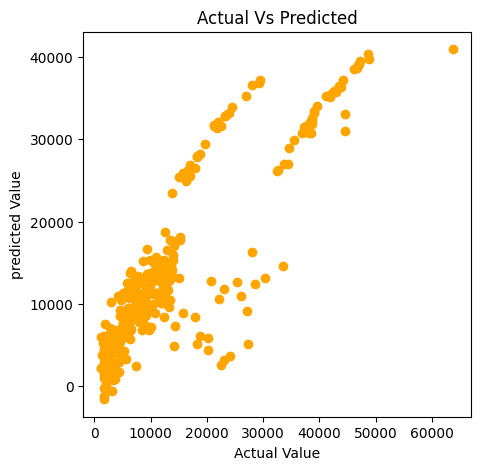

In [44]:
#Scatter plot for actual value vs Predicted
plt.figure(figsize=(5,5))
plt.scatter(y_test,predict,color='orange')
plt.xlabel('Actual Value')
plt.ylabel('predicted Value')
plt.title('Actual Vs Predicted')
plt.show()

Provide interpretations of the model's findings.


Mean Squared Error (MSE):(35,293,689.49) The number tells average squared error between your predicted and actual insurance charges.
The model’s predictions have an average squared error of ~35 million, which reflects some larger prediction errors due to outliers.
R-squared:(0.766)The model explains 76.6% of the variation in insurance charges based on the input features — a strong result for a basic regression model.